# Modification of dataset structure in order to use FADN codes for sheet "FICHA_I

In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

def order_dict_by_value(dict_):
    """
    Order dictionary by the value contained
    """
    return {k: v for k, v in sorted(dict_.items(), key = lambda item: item[1], reverse=True)}

In [2]:
# Path and file name
path = r"C:\Users\IDENER-Matlab1\Desktop\AGRICORE\SharePoint\OneDrive_2021-02-16\Microdatos para OTE370"
file_name = "book.xlsx"

# Reading microdata sheet "Ficha_I"
table_I = pd.read_excel(os.path.join(path, file_name), sheet_name="Ficha_I")

In [3]:
table_I.head(10)

Ejercicio  Explotacion  Categoria  Tc  Md  Superf. Tot.  Superf. Reg.  \
0       2014        55284      40130   1   0           549           109   
1       2014        55284      40320   1   0          1444           444   
2       2014        55284      50200   0   0           549             0   
3       2015        55284      50900   0   0            39             0   
4       2015        55284      90900   0   4             0             0   
5       2015        55284      50200   0   0           549             0   
6       2014        55284      50210   0   0           549             0   
7       2015        55284      40130   1   0           549           109   
8       2014        55284      50900   0   0            39             0   
9       2014        55284      90900   0   4             0             0   

   Superf. Energ.  Superf. Omg.  Invent. Inic.  Invent. Fin  Produc. Cant.  \
0               0             0              0            0             15   
1               0             0              0            0            200   
2               0             0              0            0              0   
3               0             0              0            0              0   
4               0             0              0            0              0   
5               0             0              0            0              0   
6               0             0              0            0              0   
7               0             0              0            0             26   
8               0             0              0            0              0   
9               0             0              0            0              0   

   Ventas Cant.  Ventas Euros  Autoconsumo  Reempleo  
0            15          1963            0         0  
1           200          9774            0         0  
2             0             0            0         0  
3             0             0            0         0  
4             0          1004            0         0  
5             0             0            0         0  
6             0             0            0         0  
7            26          3343            0         0  
8             0             0            0         0  
9             0          1166            0         0

# Agent crop selection
There is a limitation in the number of variables that can be requested to the FADN organism. It is necessary to select from all possible crops those that have the highest representation in the dataset. The crops selected will be chosen in order of appearance in the next list, which is ordered by crop surface.  
  

In [4]:
# Getting all crops available
crops = table_I["Categoria"].unique()

In [24]:
# crops by surface
crops_surf = {}

for crop in crops:
    crops_surf[crop] = table_I[table_I["Categoria"]==crop]["Superf. Tot."].sum()
    
order_dict_by_value(crops_surf)

total_s = sum(list(order_dict_by_value(crops_surf).values()))


In [33]:
table_I

Ejercicio  Explotacion  Categoria  Tc  Md  Superf. Tot.  Superf. Reg.  \
0          2014        55284      40130   1   0           549           109   
1          2014        55284      40320   1   0          1444           444   
2          2014        55284      50200   0   0           549             0   
3          2015        55284      50900   0   0            39             0   
4          2015        55284      90900   0   4             0             0   
...         ...          ...        ...  ..  ..           ...           ...   
3455       2018        92886      40320   1   0          1750             0   
3456       2018        92887      40320   1   0          1750          1750   
3457       2018        92888      40320   1   0          1300          1300   
3458       2018        92889      40320   1   0          1700          1700   
3459       2018        92890      40320   1   0          1700             0   

      Superf. Energ.  Superf. Omg.  Invent. Inic.  Invent. Fin  Produc. Cant.  \
0                  0             0              0            0             15   
1                  0             0              0            0            200   
2                  0             0              0            0              0   
3                  0             0              0            0              0   
4                  0             0              0            0              0   
...              ...           ...            ...          ...            ...   
3455               0             0              0            0            854   
3456               0             0              0            0           1020   
3457               0             0              0            0            804   
3458               0             0              0            0           1020   
3459               0             0              0            0            568   

      Ventas Cant.  Ventas Euros  Autoconsumo  Reempleo  
0               15          1963            0         0  
1              200          9774            0         0  
2                0             0            0         0  
3                0             0            0         0  
4                0          1004            0         0  
...            ...           ...          ...       ...  
3455           854         38430            0         0  
3456          1020         51129            0         0  
3457           804         40200            0         0  
3458          1020         56100            0         0  
3459           568         34080            0         0  

[3460 rows x 16 columns]

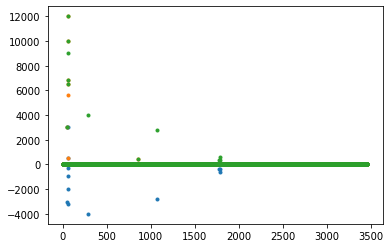

In [40]:
plt.plot(table_I["Invent. Inic."] - table_I["Invent. Fin"], ".")
plt.plot(table_I["Invent. Inic."], ".")
plt.plot(table_I["Invent. Fin"], ".")
plt.show()

In [42]:
a = 0
crop_list = []

for crop in order_dict_by_value(crops_surf).keys():
    if a <100:
        print(crop)
        crop_list.append(crop)
        
    a+=crops_surf[crop]/total_s*100

40320
40310
40330
30200
10120
10605
11220
10110
50200
40130
10220
10603
50210
10190
10140
10150
30100
10210
40210
11210
50900
30300
40460
10290
10300
40451
10604
10737
40452
10711
10712
40411
10922
10160
40114
40113
20000


In [44]:
print(len(crop_list)*7)

259


In [49]:
table_I[table_I["Categoria"]==11210]

Ejercicio  Explotacion  Categoria  Tc  Md  Superf. Tot.  Superf. Reg.  \
152        2014        55834      11210   1   3           110             0   
159        2015        55834      11210   1   3           325             0   
179        2016        56155      11210   1   3            20             0   
189        2016        56160      11210   1   3            42            35   
196        2017        56160      11210   1   3             9             2   
211        2015        56308      11210   1   3            19             0   
235        2015        56443      11210   1   3            84             0   
257        2018        72522      11210   1   3           187             0   
281        2018        72539      11210   1   3           470             0   
1891       2015        89757      11210   1   3            32             0   
2097       2016        89786      11210   1   3          1000             0   
2989       2016        90678      11210   1   3           300             0   
3091       2016        90852      11210   1   3            50             0   
3285       2017        91258      11210   1   3          2864          2864   
3300       2016        91258      11210   1   3          2864          2864   
3380       2017        92054      11210   1   3           700             0   
3386       2018        92175      11210   1   3            28             0   
3388       2017        92307      11210   1   3          1700             0   

      Superf. Energ.  Superf. Omg.  Invent. Inic.  Invent. Fin  Produc. Cant.  \
152                0             0              0            0              0   
159                0             0              0            0              0   
179                0             0              0            0              0   
189                0             0              0            0              0   
196                0             0              0            0              0   
211                0             0              0            0              0   
235                0             0              0            0              0   
257                0             0              0            0              0   
281                0             0              0            0              0   
1891               0             0              0            0              0   
2097               0             0              0            0              0   
2989               0             0              0            0              0   
3091               0             0              0            0              0   
3285               0             0              0            0              0   
3300               0             0              0            0              0   
3380               0             0              0            0              0   
3386               0             0              0            0              0   
3388               0             0              0            0              0   

      Ventas Cant.  Ventas Euros  Autoconsumo  Reempleo  
152              0             0            0         0  
159              0             0            0         0  
179              0             0            0         0  
189              0             0            0         0  
196              0             0            0         0  
211              0             0            0         0  
235              0             0            0         0  
257              0             0            0         0  
281              0             0            0         0  
1891             0             0            0         0  
2097             0             0            0         0  
2989             0             0            0         0  
3091             0             0            0         0  
3285             0             0            0         0  
3300             0             0            0         0  
3380             0             0    

After the rest of needed variables  for the agent would be selected, the list will be completed with all possible crops will and their respective variables.

Converssion with *Farmer_model.pdf/Table 16: I. CROPS*  

In [6]:
def _sortingDF(DF, columns):
    """
    Ordering dataframe by columns values
    """
    
    sortedDF = pd.DataFrame(columns=DF.columns)
    
    # Building dictionary to store n unique values for each column
    dict_ = {}
    
    for col in columns:
        dict_[col] = sorted(DF[col].unique())
    
    # Building lists containing nunique values for each list
    # Loop exploitations
    for expl in dict_["Explotacion"]:
        
        # Loop years
        for y in dict_["Ejercicio"]:
            
            # Loop Categories
            for cat in dict_["Categoria"]:
                
                dataset = DF[(DF["Explotacion"]==expl) & (DF["Ejercicio"]==y) & (DF["Categoria"]==cat)]
                    
                if not dataset.empty:
                    sortedDF = pd.concat([sortedDF, dataset])
    
    # Index modification
    sortedDF.index = np.arange(sortedDF.shape[0])
    
    return sortedDF

In [7]:
table_I_sorted = _sortingDF(table_I, ["Ejercicio", "Explotacion", "Categoria"])

In [8]:
table_I_sorted.head(10)

Ejercicio Explotacion Categoria Tc Md Superf. Tot. Superf. Reg.  \
0      2014       55284     40130  1  0          549          109   
1      2014       55284     40320  1  0         1444          444   
2      2014       55284     50200  0  0          549            0   
3      2014       55284     50210  0  0          549            0   
4      2014       55284     50900  0  0           39            0   
5      2014       55284     90900  0  4            0            0   
6      2015       55284     40130  1  0          549          109   
7      2015       55284     40320  1  0         1444          444   
8      2015       55284     50200  0  0          549            0   
9      2015       55284     50210  0  0          549            0   

  Superf. Energ. Superf. Omg. Invent. Inic. Invent. Fin Produc. Cant.  \
0              0            0             0           0            15   
1              0            0             0           0           200   
2              0            0             0           0             0   
3              0            0             0           0             0   
4              0            0             0           0             0   
5              0            0             0           0             0   
6              0            0             0           0            26   
7              0            0             0           0           180   
8              0            0             0           0             0   
9              0            0             0           0             0   

  Ventas Cant. Ventas Euros Autoconsumo Reempleo  
0           15         1963           0        0  
1          200         9774           0        0  
2            0            0           0        0  
3            0            0           0        0  
4            0            0           0        0  
5            0         1166           0        0  
6           26         3343           0        0  
7          180         8655           0        0  
8            0            0           0        0  
9            0            0           0        0

In [9]:
table_I_sorted.to_csv("table_I_sorted.csv", index=False)

## FADN tables relationships

In [20]:
codes = [[
10110, 10120, 10130, 10140, 10150, 10160, 10170, 10190, 
10210, 10220, 10290, 
10300, 10310, 10390, 
10400, 
10500], 
[
10601, 10602, 10603, 10604, 10605, 10606, 10607, 10608, 10609, 10610, 10611, 10612, 10613, 10690,
10711], 
 
[10712, 10720, 10731, 10732, 10733, 10734, 10735, 10736, 10737, 10738, 10739, 10790,
10810], 
 
[10820, 10830, 10840, 10850, 
10910, 10921, 10922, 10923, 
11000, 11100, 11210, 11220, 11300],
 
[20000, 
30100, 30200, 30300, 
40111, 40112, 40113, 40114, 40115, 40120, 40130,
40210, 40220, 40230, 40290],

[40310, 40320, 40330, 40340, 
40411, 40412, 40420, 40430, 40440, 40451, 40452, 40460, 40470],
 
[40480, 
40500,
40600, 40610,
40700, 
40800,
50100, 50200, 50210, 50900,
60000,
90100, 90200, 90300, 90310], 
 
[90320, 90330, 
90900]
]


link = {
    "Superf. Tot.": ["A", "TA"],
    "Superf. Reg.": ["A", "IR"],
    "Superf. Energ.": ["A", "EN"],
    "Superf. Omg.": ["A", "GM"],
    "Invent. Inic.": ["OV", "V"],
    "Invent. Fin": ["CV", "V"],
    "Produc. Cant.": ["PR", "Q"],
    "Ventas Cant.": ["SA", "Q"],
    "Ventas Euros": ["SA", "V"],
    "Autoconsumo": ["FC", "V"],
    "Reempleo": ["FU", "V"],}

In [21]:
# Old columns names
old_columns = ['Superf. Tot.', 'Superf. Reg.', 'Superf. Energ.', 'Superf. Omg.', 'Invent. Inic.', 'Invent. Fin', 'Produc. Cant.', 'Ventas Cant.', 'Ventas Euros', 'Autoconsumo', 'Reempleo']

### First colum converssion to  FADN

In [16]:
# Code to print all possible new columns

table_by_sheet = {}

# Loop FADN sheet tables
for sheet in codes:
    print(1+codes.index(sheet))
    
    # Acumulated per sheet
    acum = ""
    
    # Loop codes per sheet
    for code in sheet:
        
        line = ""
        
        # Loop columns
        for oc in old_columns:
            
            # Link keys extraction
            # Header 1
            h1 = link[oc][0]
            
            # Header 2
            h2 = link[oc][1]
            
            # Position 1
            p1 = "TC"
            
            # Position 2
            p2 = "MD"
            
            # New column name
            nc_name = "'I_{}_{}_{}_{}_{}'".format(h1, code, p1, p2, h2)
            
            line += "{}, ".format(nc_name)
        
        print(line)
        
        # Line addition
        acum += "{}\n".format(line)
        
    table_by_sheet[1+codes.index(sheet)] = acum
    print("\n")

1
'I_A_10110_TC_MD_TA', 'I_A_10110_TC_MD_IR', 'I_A_10110_TC_MD_EN', 'I_A_10110_TC_MD_GM', 'I_OV_10110_TC_MD_V', 'I_CV_10110_TC_MD_V', 'I_PR_10110_TC_MD_Q', 'I_SA_10110_TC_MD_Q', 'I_SA_10110_TC_MD_V', 'I_FC_10110_TC_MD_V', 'I_FU_10110_TC_MD_V', 
'I_A_10120_TC_MD_TA', 'I_A_10120_TC_MD_IR', 'I_A_10120_TC_MD_EN', 'I_A_10120_TC_MD_GM', 'I_OV_10120_TC_MD_V', 'I_CV_10120_TC_MD_V', 'I_PR_10120_TC_MD_Q', 'I_SA_10120_TC_MD_Q', 'I_SA_10120_TC_MD_V', 'I_FC_10120_TC_MD_V', 'I_FU_10120_TC_MD_V', 
'I_A_10130_TC_MD_TA', 'I_A_10130_TC_MD_IR', 'I_A_10130_TC_MD_EN', 'I_A_10130_TC_MD_GM', 'I_OV_10130_TC_MD_V', 'I_CV_10130_TC_MD_V', 'I_PR_10130_TC_MD_Q', 'I_SA_10130_TC_MD_Q', 'I_SA_10130_TC_MD_V', 'I_FC_10130_TC_MD_V', 'I_FU_10130_TC_MD_V', 
'I_A_10140_TC_MD_TA', 'I_A_10140_TC_MD_IR', 'I_A_10140_TC_MD_EN', 'I_A_10140_TC_MD_GM', 'I_OV_10140_TC_MD_V', 'I_CV_10140_TC_MD_V', 'I_PR_10140_TC_MD_Q', 'I_SA_10140_TC_MD_Q', 'I_SA_10140_TC_MD_V', 'I_FC_10140_TC_MD_V', 'I_FU_10140_TC_MD_V', 
'I_A_10150_TC_MD_TA', 'I_A

In [22]:
# FADN table I, column names cleaned manually

new_column_names = [
    'I_A_10110_TC_MD_TA', 'I_A_10110_TC_MD_IR', 'I_A_10110_TC_MD_EN', 'I_A_10110_TC_MD_GM', 'I_OV_10110_TC_MD_V', 'I_CV_10110_TC_MD_V', 'I_PR_10110_TC_MD_Q', 'I_SA_10110_TC_MD_Q', 'I_SA_10110_TC_MD_V', 'I_FC_10110_TC_MD_V', 'I_FU_10110_TC_MD_V', 
    'I_A_10120_TC_MD_TA', 'I_A_10120_TC_MD_IR', 'I_A_10120_TC_MD_EN', 'I_A_10120_TC_MD_GM', 'I_OV_10120_TC_MD_V', 'I_CV_10120_TC_MD_V', 'I_PR_10120_TC_MD_Q', 'I_SA_10120_TC_MD_Q', 'I_SA_10120_TC_MD_V', 'I_FC_10120_TC_MD_V', 'I_FU_10120_TC_MD_V', 
    'I_A_10130_TC_MD_TA', 'I_A_10130_TC_MD_IR', 'I_A_10130_TC_MD_EN', 'I_A_10130_TC_MD_GM', 'I_OV_10130_TC_MD_V', 'I_CV_10130_TC_MD_V', 'I_PR_10130_TC_MD_Q', 'I_SA_10130_TC_MD_Q', 'I_SA_10130_TC_MD_V', 'I_FC_10130_TC_MD_V', 'I_FU_10130_TC_MD_V', 
    'I_A_10140_TC_MD_TA', 'I_A_10140_TC_MD_IR', 'I_A_10140_TC_MD_EN', 'I_A_10140_TC_MD_GM', 'I_OV_10140_TC_MD_V', 'I_CV_10140_TC_MD_V', 'I_PR_10140_TC_MD_Q', 'I_SA_10140_TC_MD_Q', 'I_SA_10140_TC_MD_V', 'I_FC_10140_TC_MD_V', 'I_FU_10140_TC_MD_V', 
    'I_A_10150_TC_MD_TA', 'I_A_10150_TC_MD_IR', 'I_A_10150_TC_MD_EN', 'I_A_10150_TC_MD_GM', 'I_OV_10150_TC_MD_V', 'I_CV_10150_TC_MD_V', 'I_PR_10150_TC_MD_Q', 'I_SA_10150_TC_MD_Q', 'I_SA_10150_TC_MD_V', 'I_FC_10150_TC_MD_V', 'I_FU_10150_TC_MD_V', 
    'I_A_10160_TC_MD_TA', 'I_A_10160_TC_MD_IR', 'I_A_10160_TC_MD_EN', 'I_A_10160_TC_MD_GM', 'I_OV_10160_TC_MD_V', 'I_CV_10160_TC_MD_V', 'I_PR_10160_TC_MD_Q', 'I_SA_10160_TC_MD_Q', 'I_SA_10160_TC_MD_V', 'I_FC_10160_TC_MD_V', 'I_FU_10160_TC_MD_V', 
    'I_A_10170_TC_MD_TA', 'I_A_10170_TC_MD_IR', 'I_A_10170_TC_MD_EN', 'I_A_10170_TC_MD_GM', 'I_OV_10170_TC_MD_V', 'I_CV_10170_TC_MD_V', 'I_PR_10170_TC_MD_Q', 'I_SA_10170_TC_MD_Q', 'I_SA_10170_TC_MD_V', 'I_FC_10170_TC_MD_V', 'I_FU_10170_TC_MD_V', 
    'I_A_10190_TC_MD_TA', 'I_A_10190_TC_MD_IR', 'I_A_10190_TC_MD_EN', 'I_A_10190_TC_MD_GM', 'I_OV_10190_TC_MD_V', 'I_CV_10190_TC_MD_V', 'I_PR_10190_TC_MD_Q', 'I_SA_10190_TC_MD_Q', 'I_SA_10190_TC_MD_V', 'I_FC_10190_TC_MD_V', 'I_FU_10190_TC_MD_V', 
    'I_A_10210_TC_MD_TA', 'I_A_10210_TC_MD_IR', 'I_A_10210_TC_MD_EN', 'I_A_10210_TC_MD_GM', 'I_OV_10210_TC_MD_V', 'I_CV_10210_TC_MD_V', 'I_PR_10210_TC_MD_Q', 'I_SA_10210_TC_MD_Q', 'I_SA_10210_TC_MD_V', 'I_FC_10210_TC_MD_V', 'I_FU_10210_TC_MD_V', 
    'I_A_10220_TC_MD_TA', 'I_A_10220_TC_MD_IR', 'I_A_10220_TC_MD_EN', 'I_A_10220_TC_MD_GM', 'I_OV_10220_TC_MD_V', 'I_CV_10220_TC_MD_V', 'I_PR_10220_TC_MD_Q', 'I_SA_10220_TC_MD_Q', 'I_SA_10220_TC_MD_V', 'I_FC_10220_TC_MD_V', 'I_FU_10220_TC_MD_V', 
    'I_A_10290_TC_MD_TA', 'I_A_10290_TC_MD_IR', 'I_A_10290_TC_MD_EN', 'I_A_10290_TC_MD_GM', 'I_OV_10290_TC_MD_V', 'I_CV_10290_TC_MD_V', 'I_PR_10290_TC_MD_Q', 'I_SA_10290_TC_MD_Q', 'I_SA_10290_TC_MD_V', 'I_FC_10290_TC_MD_V', 'I_FU_10290_TC_MD_V', 
    'I_A_10300_TC_MD_TA', 'I_A_10300_TC_MD_IR', 'I_A_10300_TC_MD_EN', 'I_A_10300_TC_MD_GM', 'I_OV_10300_TC_MD_V', 'I_CV_10300_TC_MD_V', 'I_PR_10300_TC_MD_Q', 'I_SA_10300_TC_MD_Q', 'I_SA_10300_TC_MD_V', 'I_FC_10300_TC_MD_V', 'I_FU_10300_TC_MD_V', 
    'I_A_10310_TC_MD_TA', 'I_A_10310_TC_MD_IR', 'I_A_10310_TC_MD_EN', 'I_A_10310_TC_MD_GM', 'I_OV_10310_TC_MD_V', 'I_CV_10310_TC_MD_V', 'I_PR_10310_TC_MD_Q', 'I_SA_10310_TC_MD_Q', 'I_SA_10310_TC_MD_V', 'I_FC_10310_TC_MD_V', 'I_FU_10310_TC_MD_V', 
    'I_A_10390_TC_MD_TA', 'I_A_10390_TC_MD_IR', 'I_A_10390_TC_MD_EN', 'I_A_10390_TC_MD_GM', 'I_OV_10390_TC_MD_V', 'I_CV_10390_TC_MD_V', 'I_PR_10390_TC_MD_Q', 'I_SA_10390_TC_MD_Q', 'I_SA_10390_TC_MD_V', 'I_FC_10390_TC_MD_V', 'I_FU_10390_TC_MD_V', 
    'I_A_10400_TC_MD_TA', 'I_A_10400_TC_MD_IR', 'I_A_10400_TC_MD_EN', 'I_A_10400_TC_MD_GM', 'I_OV_10400_TC_MD_V', 'I_CV_10400_TC_MD_V', 'I_PR_10400_TC_MD_Q', 'I_SA_10400_TC_MD_Q', 'I_SA_10400_TC_MD_V', 'I_FC_10400_TC_MD_V', 'I_FU_10400_TC_MD_V', 
    'I_A_10500_TC_MD_TA', 'I_A_10500_TC_MD_IR', 'I_A_10500_TC_MD_EN', 'I_A_10500_TC_MD_GM', 'I_OV_10500_TC_MD_V', 'I_CV_10500_TC_MD_V', 'I_PR_10500_TC_MD_Q', 'I_SA_10500_TC_MD_Q', 'I_SA_10500_TC_MD_V', 'I_FC_10500_TC_MD_V', 'I_FU_10500_TC_MD_V',
    
    'I_A_10601_TC_MD_TA', 'I_A_10601_TC_MD_IR', 'I_A_10601_TC_MD_EN', 'I_A_10601_TC_MD_GM', 'I_OV_10601_TC_MD_V', 'I_CV_10601_TC_MD_V', 'I_PR_10601_TC_MD_Q', 'I_SA_10601_TC_MD_Q', 'I_SA_10601_TC_MD_V', 'I_FC_10601_TC_MD_V', 'I_FU_10601_TC_MD_V', 
    'I_A_10602_TC_MD_TA', 'I_A_10602_TC_MD_IR', 'I_A_10602_TC_MD_EN', 'I_A_10602_TC_MD_GM', 'I_OV_10602_TC_MD_V', 'I_CV_10602_TC_MD_V', 'I_PR_10602_TC_MD_Q', 'I_SA_10602_TC_MD_Q', 'I_SA_10602_TC_MD_V', 'I_FC_10602_TC_MD_V', 'I_FU_10602_TC_MD_V', 
    'I_A_10603_TC_MD_TA', 'I_A_10603_TC_MD_IR', 'I_A_10603_TC_MD_EN', 'I_A_10603_TC_MD_GM', 'I_OV_10603_TC_MD_V', 'I_CV_10603_TC_MD_V', 'I_PR_10603_TC_MD_Q', 'I_SA_10603_TC_MD_Q', 'I_SA_10603_TC_MD_V', 'I_FC_10603_TC_MD_V', 'I_FU_10603_TC_MD_V', 
    'I_A_10604_TC_MD_TA', 'I_A_10604_TC_MD_IR', 'I_A_10604_TC_MD_EN', 'I_A_10604_TC_MD_GM', 'I_OV_10604_TC_MD_V', 'I_CV_10604_TC_MD_V', 'I_PR_10604_TC_MD_Q', 'I_SA_10604_TC_MD_Q', 'I_SA_10604_TC_MD_V', 'I_FC_10604_TC_MD_V', 'I_FU_10604_TC_MD_V', 
    'I_A_10605_TC_MD_TA', 'I_A_10605_TC_MD_IR', 'I_A_10605_TC_MD_EN', 'I_A_10605_TC_MD_GM', 'I_OV_10605_TC_MD_V', 'I_CV_10605_TC_MD_V', 'I_PR_10605_TC_MD_Q', 'I_SA_10605_TC_MD_Q', 'I_SA_10605_TC_MD_V', 'I_FC_10605_TC_MD_V', 'I_FU_10605_TC_MD_V', 
    'I_A_10606_TC_MD_TA', 'I_A_10606_TC_MD_IR', 'I_A_10606_TC_MD_EN', 'I_A_10606_TC_MD_GM', 'I_OV_10606_TC_MD_V', 'I_CV_10606_TC_MD_V', 'I_PR_10606_TC_MD_Q', 'I_SA_10606_TC_MD_Q', 'I_SA_10606_TC_MD_V', 'I_FC_10606_TC_MD_V', 'I_FU_10606_TC_MD_V', 
    'I_A_10607_TC_MD_TA', 'I_A_10607_TC_MD_IR', 'I_A_10607_TC_MD_EN', 'I_A_10607_TC_MD_GM', 'I_OV_10607_TC_MD_V', 'I_CV_10607_TC_MD_V', 'I_PR_10607_TC_MD_Q', 'I_SA_10607_TC_MD_Q', 'I_SA_10607_TC_MD_V', 'I_FC_10607_TC_MD_V', 'I_FU_10607_TC_MD_V', 
    'I_A_10608_TC_MD_TA', 'I_A_10608_TC_MD_IR', 'I_A_10608_TC_MD_EN', 'I_A_10608_TC_MD_GM', 'I_OV_10608_TC_MD_V', 'I_CV_10608_TC_MD_V', 'I_PR_10608_TC_MD_Q', 'I_SA_10608_TC_MD_Q', 'I_SA_10608_TC_MD_V', 'I_FC_10608_TC_MD_V', 'I_FU_10608_TC_MD_V', 
    'I_A_10609_TC_MD_TA', 'I_A_10609_TC_MD_IR', 'I_A_10609_TC_MD_EN', 'I_A_10609_TC_MD_GM', 'I_OV_10609_TC_MD_V', 'I_CV_10609_TC_MD_V', 'I_PR_10609_TC_MD_Q', 'I_SA_10609_TC_MD_Q', 'I_SA_10609_TC_MD_V', 'I_FC_10609_TC_MD_V', 'I_FU_10609_TC_MD_V', 
    'I_A_10610_TC_MD_TA', 'I_A_10610_TC_MD_IR', 'I_A_10610_TC_MD_EN', 'I_A_10610_TC_MD_GM', 'I_OV_10610_TC_MD_V', 'I_CV_10610_TC_MD_V', 'I_PR_10610_TC_MD_Q', 'I_SA_10610_TC_MD_Q', 'I_SA_10610_TC_MD_V', 'I_FC_10610_TC_MD_V', 'I_FU_10610_TC_MD_V', 
    'I_A_10611_TC_MD_TA', 'I_A_10611_TC_MD_IR', 'I_A_10611_TC_MD_EN', 'I_A_10611_TC_MD_GM', 'I_OV_10611_TC_MD_V', 'I_CV_10611_TC_MD_V', 'I_PR_10611_TC_MD_Q', 'I_SA_10611_TC_MD_Q', 'I_SA_10611_TC_MD_V', 'I_FC_10611_TC_MD_V', 'I_FU_10611_TC_MD_V', 
    'I_A_10612_TC_MD_TA', 'I_A_10612_TC_MD_IR', 'I_A_10612_TC_MD_EN', 'I_A_10612_TC_MD_GM', 'I_OV_10612_TC_MD_V', 'I_CV_10612_TC_MD_V', 'I_PR_10612_TC_MD_Q', 'I_SA_10612_TC_MD_Q', 'I_SA_10612_TC_MD_V', 'I_FC_10612_TC_MD_V', 'I_FU_10612_TC_MD_V', 
    'I_A_10613_TC_MD_TA', 'I_A_10613_TC_MD_IR', 'I_A_10613_TC_MD_EN', 'I_A_10613_TC_MD_GM', 'I_OV_10613_TC_MD_V', 'I_CV_10613_TC_MD_V', 'I_PR_10613_TC_MD_Q', 'I_SA_10613_TC_MD_Q', 'I_SA_10613_TC_MD_V', 'I_FC_10613_TC_MD_V', 'I_FU_10613_TC_MD_V', 
    'I_A_10690_TC_MD_TA', 'I_A_10690_TC_MD_IR', 'I_A_10690_TC_MD_EN', 'I_A_10690_TC_MD_GM', 'I_OV_10690_TC_MD_V', 'I_CV_10690_TC_MD_V', 'I_PR_10690_TC_MD_Q', 'I_SA_10690_TC_MD_Q', 'I_SA_10690_TC_MD_V', 'I_FC_10690_TC_MD_V', 'I_FU_10690_TC_MD_V', 
    'I_A_10711_TC_MD_TA', 'I_A_10711_TC_MD_IR', 'I_A_10711_TC_MD_EN', 'I_A_10711_TC_MD_GM', 'I_OV_10711_TC_MD_V', 'I_CV_10711_TC_MD_V', 'I_PR_10711_TC_MD_Q', 'I_SA_10711_TC_MD_Q', 'I_SA_10711_TC_MD_V', 'I_FC_10711_TC_MD_V', 'I_FU_10711_TC_MD_V',
    
    'I_A_10712_TC_MD_TA', 'I_A_10712_TC_MD_IR', 'I_A_10712_TC_MD_EN', 'I_A_10712_TC_MD_GM', 'I_OV_10712_TC_MD_V', 'I_CV_10712_TC_MD_V', 'I_PR_10712_TC_MD_Q', 'I_SA_10712_TC_MD_Q', 'I_SA_10712_TC_MD_V', 'I_FC_10712_TC_MD_V', 'I_FU_10712_TC_MD_V', 
    'I_A_10720_TC_MD_TA', 'I_A_10720_TC_MD_IR', 'I_A_10720_TC_MD_EN', 'I_A_10720_TC_MD_GM', 'I_OV_10720_TC_MD_V', 'I_CV_10720_TC_MD_V', 'I_PR_10720_TC_MD_Q', 'I_SA_10720_TC_MD_Q', 'I_SA_10720_TC_MD_V', 'I_FC_10720_TC_MD_V', 'I_FU_10720_TC_MD_V', 
    'I_A_10731_TC_MD_TA', 'I_A_10731_TC_MD_IR', 'I_A_10731_TC_MD_EN', 'I_A_10731_TC_MD_GM', 'I_OV_10731_TC_MD_V', 'I_CV_10731_TC_MD_V', 'I_PR_10731_TC_MD_Q', 'I_SA_10731_TC_MD_Q', 'I_SA_10731_TC_MD_V', 'I_FC_10731_TC_MD_V', 'I_FU_10731_TC_MD_V', 
    'I_A_10732_TC_MD_TA', 'I_A_10732_TC_MD_IR', 'I_A_10732_TC_MD_EN', 'I_A_10732_TC_MD_GM', 'I_OV_10732_TC_MD_V', 'I_CV_10732_TC_MD_V', 'I_PR_10732_TC_MD_Q', 'I_SA_10732_TC_MD_Q', 'I_SA_10732_TC_MD_V', 'I_FC_10732_TC_MD_V', 'I_FU_10732_TC_MD_V', 
    'I_A_10733_TC_MD_TA', 'I_A_10733_TC_MD_IR', 'I_A_10733_TC_MD_EN', 'I_A_10733_TC_MD_GM', 'I_OV_10733_TC_MD_V', 'I_CV_10733_TC_MD_V', 'I_PR_10733_TC_MD_Q', 'I_SA_10733_TC_MD_Q', 'I_SA_10733_TC_MD_V', 'I_FC_10733_TC_MD_V', 'I_FU_10733_TC_MD_V', 
    'I_A_10734_TC_MD_TA', 'I_A_10734_TC_MD_IR', 'I_A_10734_TC_MD_EN', 'I_A_10734_TC_MD_GM', 'I_OV_10734_TC_MD_V', 'I_CV_10734_TC_MD_V', 'I_PR_10734_TC_MD_Q', 'I_SA_10734_TC_MD_Q', 'I_SA_10734_TC_MD_V', 'I_FC_10734_TC_MD_V', 'I_FU_10734_TC_MD_V', 
    'I_A_10735_TC_MD_TA', 'I_A_10735_TC_MD_IR', 'I_A_10735_TC_MD_EN', 'I_A_10735_TC_MD_GM', 'I_OV_10735_TC_MD_V', 'I_CV_10735_TC_MD_V', 'I_PR_10735_TC_MD_Q', 'I_SA_10735_TC_MD_Q', 'I_SA_10735_TC_MD_V', 'I_FC_10735_TC_MD_V', 'I_FU_10735_TC_MD_V', 
    'I_A_10736_TC_MD_TA', 'I_A_10736_TC_MD_IR', 'I_A_10736_TC_MD_EN', 'I_A_10736_TC_MD_GM', 'I_OV_10736_TC_MD_V', 'I_CV_10736_TC_MD_V', 'I_PR_10736_TC_MD_Q', 'I_SA_10736_TC_MD_Q', 'I_SA_10736_TC_MD_V', 'I_FC_10736_TC_MD_V', 'I_FU_10736_TC_MD_V', 
    'I_A_10737_TC_MD_TA', 'I_A_10737_TC_MD_IR', 'I_A_10737_TC_MD_EN', 'I_A_10737_TC_MD_GM', 'I_OV_10737_TC_MD_V', 'I_CV_10737_TC_MD_V', 'I_PR_10737_TC_MD_Q', 'I_SA_10737_TC_MD_Q', 'I_SA_10737_TC_MD_V', 'I_FC_10737_TC_MD_V', 'I_FU_10737_TC_MD_V', 
    'I_A_10738_TC_MD_TA', 'I_A_10738_TC_MD_IR', 'I_A_10738_TC_MD_EN', 'I_A_10738_TC_MD_GM', 'I_OV_10738_TC_MD_V', 'I_CV_10738_TC_MD_V', 'I_PR_10738_TC_MD_Q', 'I_SA_10738_TC_MD_Q', 'I_SA_10738_TC_MD_V', 'I_FC_10738_TC_MD_V', 'I_FU_10738_TC_MD_V', 
    'I_A_10739_TC_MD_TA', 'I_A_10739_TC_MD_IR', 'I_A_10739_TC_MD_EN', 'I_A_10739_TC_MD_GM', 'I_OV_10739_TC_MD_V', 'I_CV_10739_TC_MD_V', 'I_PR_10739_TC_MD_Q', 'I_SA_10739_TC_MD_Q', 'I_SA_10739_TC_MD_V', 'I_FC_10739_TC_MD_V', 'I_FU_10739_TC_MD_V', 
    'I_A_10790_TC_MD_TA', 'I_A_10790_TC_MD_IR', 'I_A_10790_TC_MD_EN', 'I_A_10790_TC_MD_GM', 'I_OV_10790_TC_MD_V', 'I_CV_10790_TC_MD_V', 'I_PR_10790_TC_MD_Q', 'I_SA_10790_TC_MD_Q', 'I_SA_10790_TC_MD_V', 'I_FC_10790_TC_MD_V', 'I_FU_10790_TC_MD_V', 
    'I_A_10810_TC_MD_TA', 'I_A_10810_TC_MD_IR', 'I_A_10810_TC_MD_EN', 'I_A_10810_TC_MD_GM', 'I_OV_10810_TC_MD_V', 'I_CV_10810_TC_MD_V', 'I_SA_10810_TC_MD_V', 'I_FC_10810_TC_MD_V', 'I_FU_10810_TC_MD_V',

    'I_A_10820_TC_MD_TA', 'I_A_10820_TC_MD_IR', 'I_A_10820_TC_MD_EN', 'I_A_10820_TC_MD_GM', 'I_OV_10820_TC_MD_V', 'I_CV_10820_TC_MD_V', 'I_SA_10820_TC_MD_V', 'I_FC_10820_TC_MD_V', 'I_FU_10820_TC_MD_V', 
    'I_A_10830_TC_MD_TA', 'I_A_10830_TC_MD_IR', 'I_A_10830_TC_MD_EN', 'I_A_10830_TC_MD_GM', 'I_OV_10830_TC_MD_V', 'I_CV_10830_TC_MD_V', 'I_SA_10830_TC_MD_V', 'I_FC_10830_TC_MD_V', 'I_FU_10830_TC_MD_V', 
    'I_A_10840_TC_MD_TA', 'I_A_10840_TC_MD_IR', 'I_A_10840_TC_MD_EN', 'I_A_10840_TC_MD_GM', 'I_OV_10840_TC_MD_V', 'I_CV_10840_TC_MD_V', 'I_SA_10840_TC_MD_V', 'I_FC_10840_TC_MD_V', 'I_FU_10840_TC_MD_V', 
    'I_A_10850_TC_MD_TA', 'I_A_10850_TC_MD_IR', 'I_A_10850_TC_MD_EN', 'I_A_10850_TC_MD_GM', 'I_OV_10850_TC_MD_V', 'I_CV_10850_TC_MD_V', 'I_SA_10850_TC_MD_V', 'I_FC_10850_TC_MD_V', 'I_FU_10850_TC_MD_V', 
    'I_A_10910_TC_MD_TA', 'I_A_10910_TC_MD_IR', 'I_A_10910_TC_MD_EN', 'I_A_10910_TC_MD_GM', 'I_OV_10910_TC_MD_V', 'I_CV_10910_TC_MD_V', 'I_PR_10910_TC_MD_Q', 'I_SA_10910_TC_MD_Q', 'I_SA_10910_TC_MD_V', 'I_FC_10910_TC_MD_V', 'I_FU_10910_TC_MD_V', 
    'I_A_10921_TC_MD_TA', 'I_A_10921_TC_MD_IR', 'I_A_10921_TC_MD_EN', 'I_A_10921_TC_MD_GM', 'I_OV_10921_TC_MD_V', 'I_CV_10921_TC_MD_V', 'I_PR_10921_TC_MD_Q', 'I_SA_10921_TC_MD_Q', 'I_SA_10921_TC_MD_V', 'I_FC_10921_TC_MD_V', 'I_FU_10921_TC_MD_V', 
    'I_A_10922_TC_MD_TA', 'I_A_10922_TC_MD_IR', 'I_A_10922_TC_MD_EN', 'I_A_10922_TC_MD_GM', 'I_OV_10922_TC_MD_V', 'I_CV_10922_TC_MD_V', 'I_PR_10922_TC_MD_Q', 'I_SA_10922_TC_MD_Q', 'I_SA_10922_TC_MD_V', 'I_FC_10922_TC_MD_V', 'I_FU_10922_TC_MD_V', 
    'I_A_10923_TC_MD_TA', 'I_A_10923_TC_MD_IR', 'I_A_10923_TC_MD_EN', 'I_A_10923_TC_MD_GM', 'I_OV_10923_TC_MD_V', 'I_CV_10923_TC_MD_V', 'I_PR_10923_TC_MD_Q', 'I_SA_10923_TC_MD_Q', 'I_SA_10923_TC_MD_V', 'I_FC_10923_TC_MD_V', 'I_FU_10923_TC_MD_V', 
    'I_A_11000_TC_MD_TA', 'I_A_11000_TC_MD_IR', 'I_A_11000_TC_MD_EN', 'I_A_11000_TC_MD_GM', 'I_OV_11000_TC_MD_V', 'I_CV_11000_TC_MD_V', 'I_PR_11000_TC_MD_Q', 'I_SA_11000_TC_MD_Q', 'I_SA_11000_TC_MD_V', 'I_FC_11000_TC_MD_V', 'I_FU_11000_TC_MD_V', 
    'I_A_11100_TC_MD_TA', 'I_A_11100_TC_MD_IR', 'I_A_11100_TC_MD_EN', 'I_A_11100_TC_MD_GM', 'I_OV_11100_TC_MD_V', 'I_CV_11100_TC_MD_V', 'I_PR_11100_TC_MD_Q', 'I_SA_11100_TC_MD_Q', 'I_SA_11100_TC_MD_V', 'I_FC_11100_TC_MD_V', 'I_FU_11100_TC_MD_V', 
    'I_A_11210_TC_MD_TA', 'I_A_11210_TC_MD_IR', 'I_A_11210_TC_MD_EN', 'I_A_11210_TC_MD_GM', 'I_OV_11210_TC_MD_V', 'I_CV_11210_TC_MD_V', 'I_PR_11210_TC_MD_Q', 'I_SA_11210_TC_MD_Q', 'I_SA_11210_TC_MD_V', 'I_FC_11210_TC_MD_V', 'I_FU_11210_TC_MD_V', 
    'I_A_11220_TC_MD_TA', 
    'I_A_11300_TC_MD_TA', 'I_SA_11300_TC_MD_V',
    
    'I_A_20000_TC_MD_TA', 
    'I_A_30100_TC_MD_TA', 'I_A_30100_TC_MD_IR', 'I_A_30100_TC_MD_EN', 'I_A_30100_TC_MD_GM', 'I_OV_30100_TC_MD_V', 'I_CV_30100_TC_MD_V', 'I_PR_30100_TC_MD_Q', 'I_SA_30100_TC_MD_Q', 'I_SA_30100_TC_MD_V', 'I_FC_30100_TC_MD_V', 'I_FU_30100_TC_MD_V', 
    'I_A_30200_TC_MD_TA', 'I_A_30200_TC_MD_IR', 'I_A_30200_TC_MD_EN', 'I_A_30200_TC_MD_GM', 'I_OV_30200_TC_MD_V', 'I_CV_30200_TC_MD_V', 'I_PR_30200_TC_MD_Q', 'I_SA_30200_TC_MD_Q', 'I_SA_30200_TC_MD_V', 'I_FC_30200_TC_MD_V', 'I_FU_30200_TC_MD_V', 
    'I_A_30300_TC_MD_TA', 
    'I_A_40111_TC_MD_TA', 'I_A_40111_TC_MD_IR', 'I_A_40111_TC_MD_EN', 'I_A_40111_TC_MD_GM', 'I_OV_40111_TC_MD_V', 'I_CV_40111_TC_MD_V', 'I_PR_40111_TC_MD_Q', 'I_SA_40111_TC_MD_Q', 'I_SA_40111_TC_MD_V', 'I_FC_40111_TC_MD_V', 'I_FU_40111_TC_MD_V', 
    'I_A_40112_TC_MD_TA', 'I_A_40112_TC_MD_IR', 'I_A_40112_TC_MD_EN', 'I_A_40112_TC_MD_GM', 'I_OV_40112_TC_MD_V', 'I_CV_40112_TC_MD_V', 'I_PR_40112_TC_MD_Q', 'I_SA_40112_TC_MD_Q', 'I_SA_40112_TC_MD_V', 'I_FC_40112_TC_MD_V', 'I_FU_40112_TC_MD_V', 
    'I_A_40113_TC_MD_TA', 'I_A_40113_TC_MD_IR', 'I_A_40113_TC_MD_EN', 'I_A_40113_TC_MD_GM', 'I_OV_40113_TC_MD_V', 'I_CV_40113_TC_MD_V', 'I_PR_40113_TC_MD_Q', 'I_SA_40113_TC_MD_Q', 'I_SA_40113_TC_MD_V', 'I_FC_40113_TC_MD_V', 'I_FU_40113_TC_MD_V', 
    'I_A_40114_TC_MD_TA', 'I_A_40114_TC_MD_IR', 'I_A_40114_TC_MD_EN', 'I_A_40114_TC_MD_GM', 'I_OV_40114_TC_MD_V', 'I_CV_40114_TC_MD_V', 'I_PR_40114_TC_MD_Q', 'I_SA_40114_TC_MD_Q', 'I_SA_40114_TC_MD_V', 'I_FC_40114_TC_MD_V', 'I_FU_40114_TC_MD_V', 
    'I_A_40115_TC_MD_TA', 'I_A_40115_TC_MD_IR', 'I_A_40115_TC_MD_EN', 'I_A_40115_TC_MD_GM', 'I_OV_40115_TC_MD_V', 'I_CV_40115_TC_MD_V', 'I_PR_40115_TC_MD_Q', 'I_SA_40115_TC_MD_Q', 'I_SA_40115_TC_MD_V', 'I_FC_40115_TC_MD_V', 'I_FU_40115_TC_MD_V', 
    'I_A_40120_TC_MD_TA', 'I_A_40120_TC_MD_IR', 'I_A_40120_TC_MD_EN', 'I_A_40120_TC_MD_GM', 'I_OV_40120_TC_MD_V', 'I_CV_40120_TC_MD_V', 'I_PR_40120_TC_MD_Q', 'I_SA_40120_TC_MD_Q', 'I_SA_40120_TC_MD_V', 'I_FC_40120_TC_MD_V', 'I_FU_40120_TC_MD_V', 
    'I_A_40130_TC_MD_TA', 'I_A_40130_TC_MD_IR', 'I_A_40130_TC_MD_EN', 'I_A_40130_TC_MD_GM', 'I_OV_40130_TC_MD_V', 'I_CV_40130_TC_MD_V', 'I_PR_40130_TC_MD_Q', 'I_SA_40130_TC_MD_Q', 'I_SA_40130_TC_MD_V', 'I_FC_40130_TC_MD_V', 'I_FU_40130_TC_MD_V', 
    'I_A_40210_TC_MD_TA', 'I_A_40210_TC_MD_IR', 'I_A_40210_TC_MD_EN', 'I_A_40210_TC_MD_GM', 'I_OV_40210_TC_MD_V', 'I_CV_40210_TC_MD_V', 'I_PR_40210_TC_MD_Q', 'I_SA_40210_TC_MD_Q', 'I_SA_40210_TC_MD_V', 'I_FC_40210_TC_MD_V', 'I_FU_40210_TC_MD_V', 
    'I_A_40220_TC_MD_TA', 'I_A_40220_TC_MD_IR', 'I_A_40220_TC_MD_EN', 'I_A_40220_TC_MD_GM', 'I_OV_40220_TC_MD_V', 'I_CV_40220_TC_MD_V', 'I_PR_40220_TC_MD_Q', 'I_SA_40220_TC_MD_Q', 'I_SA_40220_TC_MD_V', 'I_FC_40220_TC_MD_V', 'I_FU_40220_TC_MD_V', 
    'I_A_40230_TC_MD_TA', 'I_A_40230_TC_MD_IR', 'I_A_40230_TC_MD_EN', 'I_A_40230_TC_MD_GM', 'I_OV_40230_TC_MD_V', 'I_CV_40230_TC_MD_V', 'I_PR_40230_TC_MD_Q', 'I_SA_40230_TC_MD_Q', 'I_SA_40230_TC_MD_V', 'I_FC_40230_TC_MD_V', 'I_FU_40230_TC_MD_V', 
    'I_A_40290_TC_MD_TA', 'I_A_40290_TC_MD_IR', 'I_A_40290_TC_MD_EN', 'I_A_40290_TC_MD_GM', 'I_OV_40290_TC_MD_V', 'I_CV_40290_TC_MD_V', 'I_PR_40290_TC_MD_Q', 'I_SA_40290_TC_MD_Q', 'I_SA_40290_TC_MD_V', 'I_FC_40290_TC_MD_V', 'I_FU_40290_TC_MD_V',

    'I_A_40310_TC_MD_TA', 'I_A_40310_TC_MD_IR', 'I_A_40310_TC_MD_EN', 'I_A_40310_TC_MD_GM', 'I_OV_40310_TC_MD_V', 'I_CV_40310_TC_MD_V', 'I_PR_40310_TC_MD_Q', 'I_SA_40310_TC_MD_Q', 'I_SA_40310_TC_MD_V', 'I_FC_40310_TC_MD_V', 'I_FU_40310_TC_MD_V', 
    'I_A_40320_TC_MD_TA', 'I_A_40320_TC_MD_IR', 'I_A_40320_TC_MD_EN', 'I_A_40320_TC_MD_GM', 'I_OV_40320_TC_MD_V', 'I_CV_40320_TC_MD_V', 'I_PR_40320_TC_MD_Q', 'I_SA_40320_TC_MD_Q', 'I_SA_40320_TC_MD_V', 'I_FC_40320_TC_MD_V', 'I_FU_40320_TC_MD_V', 
    'I_A_40330_TC_MD_TA', 'I_A_40330_TC_MD_IR', 'I_A_40330_TC_MD_EN', 'I_A_40330_TC_MD_GM', 'I_OV_40330_TC_MD_V', 'I_CV_40330_TC_MD_V', 'I_PR_40330_TC_MD_Q', 'I_SA_40330_TC_MD_Q', 'I_SA_40330_TC_MD_V', 'I_FC_40330_TC_MD_V', 'I_FU_40330_TC_MD_V', 
    'I_OV_40340_TC_MD_V', 'I_CV_40340_TC_MD_V', 'I_PR_40340_TC_MD_Q', 'I_SA_40340_TC_MD_Q', 'I_SA_40340_TC_MD_V', 'I_FC_40340_TC_MD_V', 'I_FU_40340_TC_MD_V', 
    'I_A_40411_TC_MD_TA', 'I_A_40411_TC_MD_IR', 'I_A_40411_TC_MD_EN', 'I_A_40411_TC_MD_GM', 'I_OV_40411_TC_MD_V', 'I_CV_40411_TC_MD_V', 'I_PR_40411_TC_MD_Q', 'I_SA_40411_TC_MD_Q', 'I_SA_40411_TC_MD_V', 'I_FC_40411_TC_MD_V', 'I_FU_40411_TC_MD_V', 
    'I_A_40412_TC_MD_TA', 'I_A_40412_TC_MD_IR', 'I_A_40412_TC_MD_EN', 'I_A_40412_TC_MD_GM', 'I_OV_40412_TC_MD_V', 'I_CV_40412_TC_MD_V', 'I_PR_40412_TC_MD_Q', 'I_SA_40412_TC_MD_Q', 'I_SA_40412_TC_MD_V', 'I_FC_40412_TC_MD_V', 'I_FU_40412_TC_MD_V', 
    'I_A_40420_TC_MD_TA', 'I_A_40420_TC_MD_IR', 'I_A_40420_TC_MD_EN', 'I_A_40420_TC_MD_GM', 'I_OV_40420_TC_MD_V', 'I_CV_40420_TC_MD_V', 'I_PR_40420_TC_MD_Q', 'I_SA_40420_TC_MD_Q', 'I_SA_40420_TC_MD_V', 'I_FC_40420_TC_MD_V', 'I_FU_40420_TC_MD_V', 
    'I_A_40430_TC_MD_TA', 'I_A_40430_TC_MD_IR', 'I_A_40430_TC_MD_EN', 'I_A_40430_TC_MD_GM', 'I_OV_40430_TC_MD_V', 'I_CV_40430_TC_MD_V', 'I_PR_40430_TC_MD_Q', 'I_SA_40430_TC_MD_Q', 'I_SA_40430_TC_MD_V', 'I_FC_40430_TC_MD_V', 'I_FU_40430_TC_MD_V', 
    'I_A_40440_TC_MD_TA', 'I_A_40440_TC_MD_IR', 'I_A_40440_TC_MD_EN', 'I_A_40440_TC_MD_GM', 'I_OV_40440_TC_MD_V', 'I_CV_40440_TC_MD_V', 'I_PR_40440_TC_MD_Q', 'I_SA_40440_TC_MD_Q', 'I_SA_40440_TC_MD_V', 'I_FC_40440_TC_MD_V', 'I_FU_40440_TC_MD_V', 
    'I_A_40451_TC_MD_TA', 'I_A_40451_TC_MD_IR', 'I_A_40451_TC_MD_EN', 'I_A_40451_TC_MD_GM', 'I_OV_40451_TC_MD_V', 'I_CV_40451_TC_MD_V', 'I_PR_40451_TC_MD_Q', 'I_SA_40451_TC_MD_Q', 'I_SA_40451_TC_MD_V', 'I_FC_40451_TC_MD_V', 'I_FU_40451_TC_MD_V', 
    'I_A_40452_TC_MD_TA', 'I_A_40452_TC_MD_IR', 'I_A_40452_TC_MD_EN', 'I_A_40452_TC_MD_GM', 'I_OV_40452_TC_MD_V', 'I_CV_40452_TC_MD_V', 'I_PR_40452_TC_MD_Q', 'I_SA_40452_TC_MD_Q', 'I_SA_40452_TC_MD_V', 'I_FC_40452_TC_MD_V', 'I_FU_40452_TC_MD_V', 
    'I_A_40460_TC_MD_TA', 'I_A_40460_TC_MD_IR', 'I_A_40460_TC_MD_EN', 'I_A_40460_TC_MD_GM', 'I_OV_40460_TC_MD_V', 'I_CV_40460_TC_MD_V', 'I_PR_40460_TC_MD_Q', 'I_SA_40460_TC_MD_Q', 'I_SA_40460_TC_MD_V', 'I_FC_40460_TC_MD_V', 'I_FU_40460_TC_MD_V', 
    'I_OV_40470_TC_MD_V', 'I_CV_40470_TC_MD_V', 'I_PR_40470_TC_MD_Q', 'I_SA_40470_TC_MD_Q', 'I_SA_40470_TC_MD_V', 'I_FC_40470_TC_MD_V', 'I_FU_40470_TC_MD_V',
    
    'I_OV_40480_TC_MD_V', 'I_CV_40480_TC_MD_V', 'I_PR_40480_TC_MD_Q', 'I_SA_40480_TC_MD_Q', 'I_SA_40480_TC_MD_V', 'I_FC_40480_TC_MD_V', 'I_FU_40480_TC_MD_V', 
    'I_A_40500_TC_MD_TA', 'I_A_40500_TC_MD_IR', 'I_A_40500_TC_MD_EN', 'I_A_40500_TC_MD_GM', 'I_OV_40500_TC_MD_V', 'I_CV_40500_TC_MD_V', 'I_SA_40500_TC_MD_V', 'I_FC_40500_TC_MD_V', 'I_FU_40500_TC_MD_V', 
    'I_A_40600_TC_MD_TA', 'I_A_40600_TC_MD_IR', 'I_A_40600_TC_MD_EN', 'I_A_40600_TC_MD_GM', 'I_OV_40600_TC_MD_V', 'I_CV_40600_TC_MD_V', 'I_SA_40600_TC_MD_V', 'I_FC_40600_TC_MD_V', 'I_FU_40600_TC_MD_V', 
    'I_A_40610_TC_MD_TA', 'I_A_40610_TC_MD_IR', 'I_A_40610_TC_MD_EN', 'I_A_40610_TC_MD_GM', 'I_OV_40610_TC_MD_V', 'I_CV_40610_TC_MD_V', 'I_SA_40610_TC_MD_V', 'I_FC_40610_TC_MD_V', 'I_FU_40610_TC_MD_V', 
    'I_A_40700_TC_MD_TA', 'I_A_40700_TC_MD_IR', 'I_A_40700_TC_MD_EN', 'I_A_40700_TC_MD_GM', 'I_OV_40700_TC_MD_V', 'I_CV_40700_TC_MD_V', 'I_SA_40700_TC_MD_V', 'I_FC_40700_TC_MD_V', 'I_FU_40700_TC_MD_V', 
    'I_CV_40800_TC_MD_V', 
    'I_A_50100_TC_MD_TA', 
    'I_A_50200_TC_MD_TA', 
    'I_A_50210_TC_MD_TA', 'I_A_50210_TC_MD_IR', 'I_A_50210_TC_MD_EN', 'I_A_50210_TC_MD_GM', 'I_OV_50210_TC_MD_V', 'I_CV_50210_TC_MD_V', 'I_SA_50210_TC_MD_V', 'I_FC_50210_TC_MD_V', 'I_FU_50210_TC_MD_V', 
    'I_A_50900_TC_MD_TA', 
    'I_A_60000_TC_MD_TA', 'I_A_60000_TC_MD_IR', 'I_A_60000_TC_MD_EN', 'I_A_60000_TC_MD_GM', 'I_OV_60000_TC_MD_V', 'I_CV_60000_TC_MD_V', 'I_PR_60000_TC_MD_Q', 'I_SA_60000_TC_MD_Q', 'I_SA_60000_TC_MD_V', 'I_FC_60000_TC_MD_V', 'I_FU_60000_TC_MD_V', 
    'I_A_90100_TC_MD_TA', 'I_SA_90100_TC_MD_V', 
    'I_SA_90200_TC_MD_V', 
    'I_OV_90300_TC_MD_V', 'I_CV_90300_TC_MD_V', 'I_PR_90300_TC_MD_Q', 'I_SA_90300_TC_MD_Q', 'I_SA_90300_TC_MD_V', 'I_FC_90300_TC_MD_V', 'I_FU_90300_TC_MD_V', 
    'I_OV_90310_TC_MD_V', 'I_CV_90310_TC_MD_V', 'I_PR_90310_TC_MD_Q', 'I_SA_90310_TC_MD_Q', 'I_SA_90310_TC_MD_V', 'I_FC_90310_TC_MD_V', 'I_FU_90310_TC_MD_V',

    'I_OV_90320_TC_MD_V', 'I_CV_90320_TC_MD_V', 'I_PR_90320_TC_MD_Q', 'I_SA_90320_TC_MD_Q', 'I_SA_90320_TC_MD_V', 'I_FC_90320_TC_MD_V', 'I_FU_90320_TC_MD_V', 
    'I_OV_90330_TC_MD_V', 'I_CV_90330_TC_MD_V', 'I_PR_90330_TC_MD_Q', 'I_SA_90330_TC_MD_Q', 'I_SA_90330_TC_MD_V', 'I_FC_90330_TC_MD_V', 'I_FU_90330_TC_MD_V', 
    'I_A_90900_TC_MD_TA', 'I_A_90900_TC_MD_IR', 'I_A_90900_TC_MD_EN', 'I_A_90900_TC_MD_GM', 'I_OV_90900_TC_MD_V', 'I_CV_90900_TC_MD_V', 'I_SA_90900_TC_MD_V', 'I_FC_90900_TC_MD_V', 'I_FU_90900_TC_MD_V',
    ]

In [23]:
len(new_column_names)

985

In [24]:
table_I_sorted.head(10)

Ejercicio Explotacion Categoria Tc Md Superf. Tot. Superf. Reg.  \
0      2014       55284     40130  1  0          549          109   
1      2014       55284     40320  1  0         1444          444   
2      2014       55284     50200  0  0          549            0   
3      2014       55284     50210  0  0          549            0   
4      2014       55284     50900  0  0           39            0   
5      2014       55284     90900  0  4            0            0   
6      2015       55284     40130  1  0          549          109   
7      2015       55284     40320  1  0         1444          444   
8      2015       55284     50200  0  0          549            0   
9      2015       55284     50210  0  0          549            0   

  Superf. Energ. Superf. Omg. Invent. Inic. Invent. Fin Produc. Cant.  \
0              0            0             0           0            15   
1              0            0             0           0           200   
2              0            0             0           0             0   
3              0            0             0           0             0   
4              0            0             0           0             0   
5              0            0             0           0             0   
6              0            0             0           0            26   
7              0            0             0           0           180   
8              0            0             0           0             0   
9              0            0             0           0             0   

  Ventas Cant. Ventas Euros Autoconsumo Reempleo  
0           15         1963           0        0  
1          200         9774           0        0  
2            0            0           0        0  
3            0            0           0        0  
4            0            0           0        0  
5            0         1166           0        0  
6           26         3343           0        0  
7          180         8655           0        0  
8            0            0           0        0  
9            0            0           0        0

In [38]:
table_I_sorted[table_I_sorted["Tc"] == 1].shape[0]/table_I_sorted.shape[0]

0.8257225433526012

In [29]:
table_I_sorted[table_I_sorted["Tc"] == 3]

Ejercicio Explotacion Categoria Tc Md Superf. Tot. Superf. Reg.  \
3286      2016       91258     10712  3  0          596          596   
3287      2016       91258     10737  3  0          596          596   

     Superf. Energ. Superf. Omg. Invent. Inic. Invent. Fin Produc. Cant.  \
3286              0            0             0           0          5066   
3287              0            0             0           0          5066   

     Ventas Cant. Ventas Euros Autoconsumo Reempleo  
3286         5066       121584           0        0  
3287         5066       121584           0        0

In [46]:
table_I_sorted[table_I_sorted["Tc"] == 3].shape[0]/table_I_sorted.shape[0]

0.0005780346820809249

In [39]:
table_I_sorted["Tc"].count()

3460

In [54]:
table_I_sorted[table_I_sorted["Md"] == 4].shape[0]/table_I_sorted.shape[0]

0.005780346820809248

In [55]:
table_I_sorted[table_I_sorted["Md"] == 4]["Tc"]

5       0
11      0
68      0
74      0
78      0
94      0
100     0
106     0
112     0
118     0
122     0
138     0
144     0
168     0
205     0
855     1
908     0
1569    0
1575    0
2963    0
Name: Tc, dtype: object

The new table will contain a single row per year and axploitation.  
The objective is to know if the values *Tc* and *Mc* match for each crop for all years.  
* Tc
    - 0: 17.37% instances
    - 1: 82.57% instances
    - 3: 00.05% instances  
  
  
* Md
    - 0: 75.66% instances
    - 3: 23.75% instances
    - 4: 0.57% instances
  
The meaning of Tc and Md is unknown. None correlations has been found between Tc and Md with any other column.  
  
### Columns for the new dataframe
* Group 1: [Explotacion, Ejercicio]
* Group 2: new_column_names
* Group 3: [Tc, Md]*Categories **not included**.

In [166]:
# Not used

# List storing third columns part
TcMdCategories = []

categories = sorted(list(table_I_sorted["Categoria"].unique()))

# Loop all categories
for cat in categories:
    
    # Storing the column Tc for the current category
    TcMdCategories.append("Tc_{}".format(cat))
    
    # Storing the column Md for the current category
    TcMdCategories.append("Md_{}".format(cat))
    

In [84]:
DF = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names)

DF

Empty DataFrame
Columns: [Explotacion, Ejercicio, I_A_10110_TC_MD_TA, I_A_10110_TC_MD_IR, I_A_10110_TC_MD_EN, I_A_10110_TC_MD_GM, I_OV_10110_TC_MD_V, I_CV_10110_TC_MD_V, I_PR_10110_TC_MD_Q, I_SA_10110_TC_MD_Q, I_SA_10110_TC_MD_V, I_FC_10110_TC_MD_V, I_FU_10110_TC_MD_V, I_A_10120_TC_MD_TA, I_A_10120_TC_MD_IR, I_A_10120_TC_MD_EN, I_A_10120_TC_MD_GM, I_OV_10120_TC_MD_V, I_CV_10120_TC_MD_V, I_PR_10120_TC_MD_Q, I_SA_10120_TC_MD_Q, I_SA_10120_TC_MD_V, I_FC_10120_TC_MD_V, I_FU_10120_TC_MD_V, I_A_10130_TC_MD_TA, I_A_10130_TC_MD_IR, I_A_10130_TC_MD_EN, I_A_10130_TC_MD_GM, I_OV_10130_TC_MD_V, I_CV_10130_TC_MD_V, I_PR_10130_TC_MD_Q, I_SA_10130_TC_MD_Q, I_SA_10130_TC_MD_V, I_FC_10130_TC_MD_V, I_FU_10130_TC_MD_V, I_A_10140_TC_MD_TA, I_A_10140_TC_MD_IR, I_A_10140_TC_MD_EN, I_A_10140_TC_MD_GM, I_OV_10140_TC_MD_V, I_CV_10140_TC_MD_V, I_PR_10140_TC_MD_Q, I_SA_10140_TC_MD_Q, I_SA_10140_TC_MD_V, I_FC_10140_TC_MD_V, I_FU_10140_TC_MD_V, I_A_10150_TC_MD_TA, I_A_10150_TC_MD_IR, I_A_10150_TC_MD_EN, I_A_10150_TC_MD_GM, I_OV_10150_TC_MD_V, I_CV_10150_TC_MD_V, I_PR_10150_TC_MD_Q, I_SA_10150_TC_MD_Q, I_SA_10150_TC_MD_V, I_FC_10150_TC_MD_V, I_FU_10150_TC_MD_V, I_A_10160_TC_MD_TA, I_A_10160_TC_MD_IR, I_A_10160_TC_MD_EN, I_A_10160_TC_MD_GM, I_OV_10160_TC_MD_V, I_CV_10160_TC_MD_V, I_PR_10160_TC_MD_Q, I_SA_10160_TC_MD_Q, I_SA_10160_TC_MD_V, I_FC_10160_TC_MD_V, I_FU_10160_TC_MD_V, I_A_10170_TC_MD_TA, I_A_10170_TC_MD_IR, I_A_10170_TC_MD_EN, I_A_10170_TC_MD_GM, I_OV_10170_TC_MD_V, I_CV_10170_TC_MD_V, I_PR_10170_TC_MD_Q, I_SA_10170_TC_MD_Q, I_SA_10170_TC_MD_V, I_FC_10170_TC_MD_V, I_FU_10170_TC_MD_V, I_A_10190_TC_MD_TA, I_A_10190_TC_MD_IR, I_A_10190_TC_MD_EN, I_A_10190_TC_MD_GM, I_OV_10190_TC_MD_V, I_CV_10190_TC_MD_V, I_PR_10190_TC_MD_Q, I_SA_10190_TC_MD_Q, I_SA_10190_TC_MD_V, I_FC_10190_TC_MD_V, I_FU_10190_TC_MD_V, I_A_10210_TC_MD_TA, I_A_10210_TC_MD_IR, I_A_10210_TC_MD_EN, I_A_10210_TC_MD_GM, I_OV_10210_TC_MD_V, I_CV_10210_TC_MD_V, I_PR_10210_TC_MD_Q, I_SA_10210_TC_MD_Q, I_SA_10210_TC_MD_V, I_FC_10210_TC_MD_V, ...]
Index: []

[0 rows x 987 columns]

In [85]:
# Objetivo: cada fila corresponde a una explotacion y año

def _newColumnName(oc_name, code):
    
    
    link = {
        "Superf. Tot.": ["A", "TA"],
        "Superf. Reg.": ["A", "IR"],
        "Superf. Energ.": ["A", "EN"],
        "Superf. Omg.": ["A", "GM"],
        "Invent. Inic.": ["OV", "V"],
        "Invent. Fin": ["CV", "V"],
        "Produc. Cant.": ["PR", "Q"],
        "Ventas Cant.": ["SA", "Q"],
        "Ventas Euros": ["SA", "V"],
        "Autoconsumo": ["FC", "V"],
        "Reempleo": ["FU", "V"],}

    
    return "I_{}_{}_TC_MD_{}".format(link[oc_name][0], code, link[oc_name][1])


def _DFconverssion(DF, new_col_char):
    """
    Dataframe converssion with new characterisartion
    DF: original dataframe
    new_col_char: new columns names
    """
    
    # Building new dataframe
    newDF = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names)
    
    # Sorted unique values extraction
    exploitations = sorted(DF.Explotacion.unique())
    
    index = 0
    
    # Loop all exploitations
    for expl in exploitations:
        
        # Subset for the current exploitation
        sub_expl = DF[DF["Explotacion"] == expl]
        
        # Getting all years for the current exploitation
        years = sorted(sub_expl.Ejercicio.unique())
    
        # Loop all years
        for y in years:
            
            # Extract subsets corresponding to expl and y
            sub_expl_y = sub_expl[sub_expl["Ejercicio"] == y]
            
            # Number of cotegories
            categories = sorted(sub_expl_y["Categoria"].unique())

            # Building new row
            new_row = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names, index=[index])
    
            # Assignation of new row identificators
            new_row.at[index, "Ejercicio"] = y
            new_row.at[index, "Explotacion"] = expl

            # Loop categories
            for cat in categories:
                
                # Getting the row for Exploitation/Year/Category
                row = sub_expl_y[sub_expl_y["Categoria"] == cat]
                
                # Crop code
                code = row["Categoria"].item()
                
                # Loop row columns
                for oc in row.columns:
                    
                    # Item selection
                    item = row[oc].item()
                    
                    if not oc in ["Ejercicio", "Explotacion", "Categoria", "Tc", "Md"]:

                        # Compossing new name
                        newName = _newColumnName(oc, code)
                        
                        if newName in new_col_char:

                            # Item asignation
                            new_row.at[index, newName] = item

            # DF concatenation
            newDF = pd.concat([newDF, new_row])
            
            # Increasing row index
            index += 1
            
    return newDF

In [86]:
new_table_I = _DFconverssion(table_I_sorted, new_column_names)

In [87]:
new_table_I.head()

Explotacion Ejercicio I_A_10110_TC_MD_TA I_A_10110_TC_MD_IR  \
0       55284      2014                NaN                NaN   
1       55284      2015                NaN                NaN   
2       55290      2014                NaN                NaN   
3       55290      2015                NaN                NaN   
4       55290      2016                NaN                NaN   

  I_A_10110_TC_MD_EN I_A_10110_TC_MD_GM I_OV_10110_TC_MD_V I_CV_10110_TC_MD_V  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_PR_10110_TC_MD_Q I_SA_10110_TC_MD_Q  ... I_FU_90330_TC_MD_V  \
0                NaN                NaN  ...                NaN   
1                NaN                NaN  ...                NaN   
2                NaN                NaN  ...                NaN   
3                NaN                NaN  ...                NaN   
4                NaN                NaN  ...                NaN   

  I_A_90900_TC_MD_TA I_A_90900_TC_MD_IR I_A_90900_TC_MD_EN I_A_90900_TC_MD_GM  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_OV_90900_TC_MD_V I_CV_90900_TC_MD_V I_SA_90900_TC_MD_V I_FC_90900_TC_MD_V  \
0                  0                  0               1166                  0   
1                  0                  0               1004                  0   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_FU_90900_TC_MD_V  
0                  0  
1                  0  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 987 columns]

In [94]:
new_table_I.to_csv("table_I.csv", index=False)

Selection of random exploitation/year

In [73]:
rnd_expl = random.sample(list(table_I_sorted.Explotacion), 1)[0]

rnd_year = random.sample(list(table_I_sorted[table_I_sorted["Explotacion"] == rnd_expl].Ejercicio), 1)[0]

print(rnd_expl)
print(rnd_year)

subset = table_I_sorted[(table_I_sorted["Explotacion"] == rnd_expl) & (table_I_sorted["Ejercicio"] == rnd_year)]

row2examine = new_table_I[(new_table_I["Ejercicio"] == rnd_year) & (new_table_I["Explotacion"] == rnd_expl)]
print(subset)

90925
2015
     Ejercicio Explotacion Categoria Tc Md Superf. Tot. Superf. Reg.  \
3198      2015       90925     11220  1  3          100            0   
3199      2015       90925     40320  1  0         5700            0   

     Superf. Energ. Superf. Omg. Invent. Inic. Invent. Fin Produc. Cant.  \
3198              0            0             0           0             0   
3199              0            0             0           0          1692   

     Ventas Cant. Ventas Euros Autoconsumo Reempleo  
3198            0            0           0        0  
3199         1692        87954           0        0  


## Checker
The following code will return "ERROR" in case the information contained in the old dataframe for a certain year and exploitaion would not match the corresponding new structure content.

In [92]:
errors = 0

In [93]:
# All available exploitations
exploitations = sorted(table_I_sorted["Explotacion"].unique())

for exp in exploitations:
    
    # Instances of the selected exploitation
    df_e = table_I_sorted[table_I_sorted["Explotacion"] == exp]

    # Years available for the selected exploitation
    years = sorted(df_e["Ejercicio"].unique())
    
    for y in years:
        
        # instances that belong to the current year
        df_e_y = df_e[df_e["Ejercicio"] == y]
        
        # All crops available
        crops = sorted(df_e_y["Categoria"].unique())
        
        for crop in crops:

            # instance of exp/year/crop
            row_crop = df_e_y[df_e_y["Categoria"] == crop]
        
            # Loop row_crop columns
            for col in row_crop.columns:

                if not col in ["Ejercicio", "Explotacion", "Categoria", "Tc", "Md"]:
                    
                    # 
                    old_item = row_crop[col].item()

                    # FADN column name
                    new_col_name = _newColumnName(col, crop)

                    # If FADN column name exists in FADN guide
                    if new_col_name in new_column_names:

                        new_item = new_table_I[(new_table_I["Explotacion"] == exp) & (new_table_I["Ejercicio"] == y)][new_col_name].item()

                        if new_item != old_item:
                            print("ERROR", new_col_name)
                            print(old_item, new_item)
                            errors += 1

                            
print(errors)


0
